<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/crypto-correlation-finder/Copy_of_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# prompt: Ask user to enter two crypto symbols and one index symbol

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

crypto1_symbol = input("Enter the first cryptocurrency symbol (e.g., BTC-USD): ")
crypto2_symbol = input("Enter the second cryptocurrency symbol (e.g., ETH-USD): ")
index_symbol = input("Enter the index symbol (e.g., ^SPY): ")

Enter the first cryptocurrency symbol (e.g., BTC-USD): BTC-USD
Enter the second cryptocurrency symbol (e.g., ETH-USD): ETH-USD
Enter the index symbol (e.g., ^SPY): SPY


In [ ]:
# Download data for Bitcoin and Ethereum
btc_data = yf.download(crypto1_symbol, start='2015-01-01', end='2024-11-10')
eth_data = yf.download(crypto2_symbol, start='2015-01-01', end='2024-11-10')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Rename columns for clarity
btc_data = btc_data[['Close']].rename(columns={'Close': 'BTC'})
eth_data = eth_data[['Close']].rename(columns={'Close': 'ETH'})

# Merge data on dates they have in common
combined_data = btc_data.join(eth_data, how='inner')
print(combined_data.head())  # Check the alignment


Price                              BTC         ETH
Ticker                         BTC-USD     ETH-USD
Date                                              
2017-11-09 00:00:00+00:00  7143.580078  320.884003
2017-11-10 00:00:00+00:00  6618.140137  299.252991
2017-11-11 00:00:00+00:00  6357.600098  314.681000
2017-11-12 00:00:00+00:00  5950.069824  307.907990
2017-11-13 00:00:00+00:00  6559.490234  316.716003


In [ ]:
# Calculate daily returns for BTC and ETH
combined_data['BTC Daily Return'] = combined_data['BTC'].pct_change()
combined_data['ETH Daily Return'] = combined_data['ETH'].pct_change()


In [ ]:
# Calculate 30-day rolling correlation between BTC and ETH
combined_data['Rolling Correlation'] = combined_data['BTC Daily Return'].rolling(window=30).corr(combined_data['ETH Daily Return'])


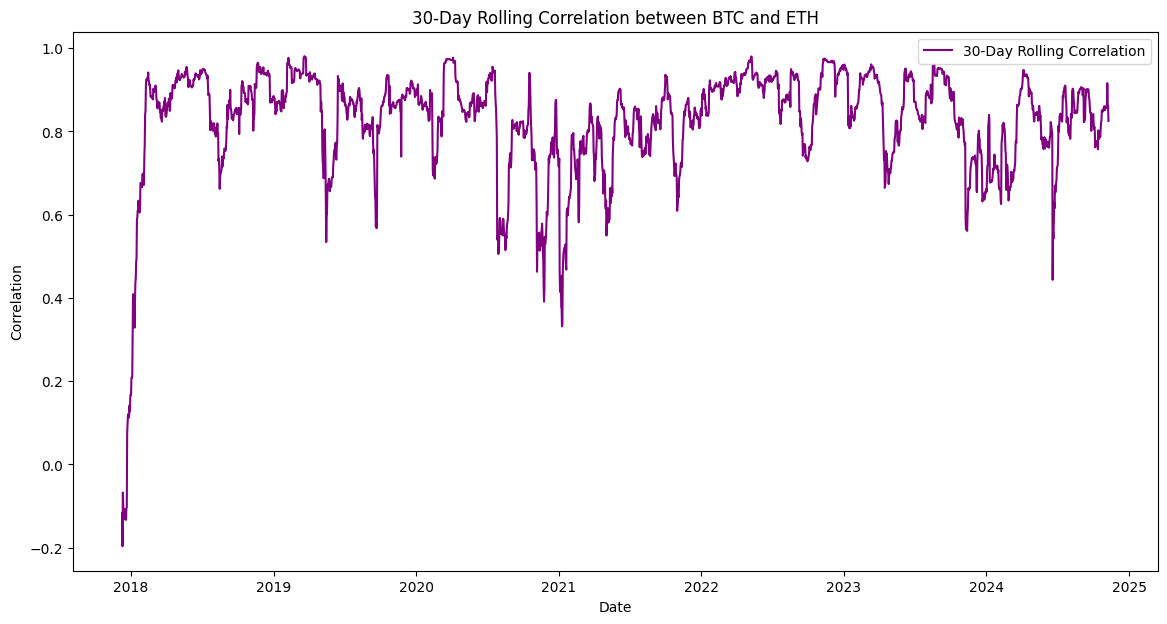

In [ ]:
# Plot rolling correlation
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Rolling Correlation'], label='30-Day Rolling Correlation', color='purple')
plt.title("30-Day Rolling Correlation between BTC and ETH")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()


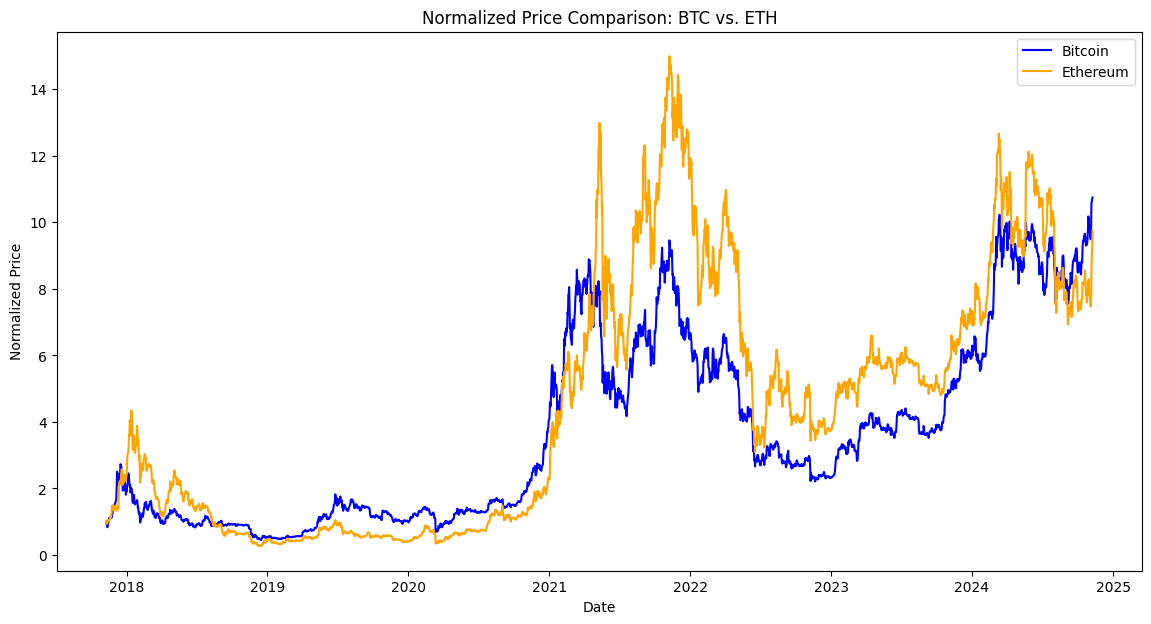

In [ ]:
combined_data['BTC Normalized'] = combined_data['BTC'] / combined_data['BTC'].iloc[0]
combined_data['ETH Normalized'] = combined_data['ETH'] / combined_data['ETH'].iloc[0]

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['BTC Normalized'], label='Bitcoin', color='blue')
plt.plot(combined_data.index, combined_data['ETH Normalized'], label='Ethereum', color='orange')
plt.title("Normalized Price Comparison: BTC vs. ETH")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


In [ ]:
# Download historical data for BTC, ETH, and SPY
btc_data = yf.download('BTC-USD', start='2019-01-01', end='2024-11-10')[['Close']]
eth_data = yf.download('ETH-USD', start='2019-01-01', end='2024-11-10')[['Close']]
spy_data = yf.download('SPY', start='2019-01-01', end='2024-11-10')[['Close']]

# Rename 'Close' columns for clarity
btc_data.columns = ['BTC']
eth_data.columns = ['ETH']
spy_data.columns = ['SPY']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Merge BTC, ETH, and SPY data on date
combined_data = btc_data.join(eth_data, how='inner').join(spy_data, how='inner')
print(combined_data.head())  # Check the structure to verify data alignment


                                   BTC         ETH         SPY
Date                                                          
2019-01-02 00:00:00+00:00  3943.409424  155.047684  250.179993
2019-01-03 00:00:00+00:00  3836.741211  149.135010  244.210007
2019-01-04 00:00:00+00:00  3857.717529  154.581940  252.389999
2019-01-07 00:00:00+00:00  4025.248291  151.699219  254.380005
2019-01-08 00:00:00+00:00  4030.847900  150.359634  256.769989


In [ ]:


# Drop rows with NaN values from returns calculation
combined_data.dropna(inplace=True)
print(combined_data.head())  # Verify the new columns are correctly added


                                   BTC         ETH         SPY
Date                                                          
2019-01-02 00:00:00+00:00  3943.409424  155.047684  250.179993
2019-01-03 00:00:00+00:00  3836.741211  149.135010  244.210007
2019-01-04 00:00:00+00:00  3857.717529  154.581940  252.389999
2019-01-07 00:00:00+00:00  4025.248291  151.699219  254.380005
2019-01-08 00:00:00+00:00  4030.847900  150.359634  256.769989


In [ ]:
# Compute the correlation matrix for daily returns
correlation_matrix = combined_data[['BTC', 'ETH', 'SPY']].corr()

# Display the correlation matrix
print("Correlation Matrix for Daily Returns:")
print(correlation_matrix)


Correlation Matrix for Daily Returns:
          BTC       ETH       SPY
BTC  1.000000  0.909199  0.902706
ETH  0.909199  1.000000  0.861635
SPY  0.902706  0.861635  1.000000


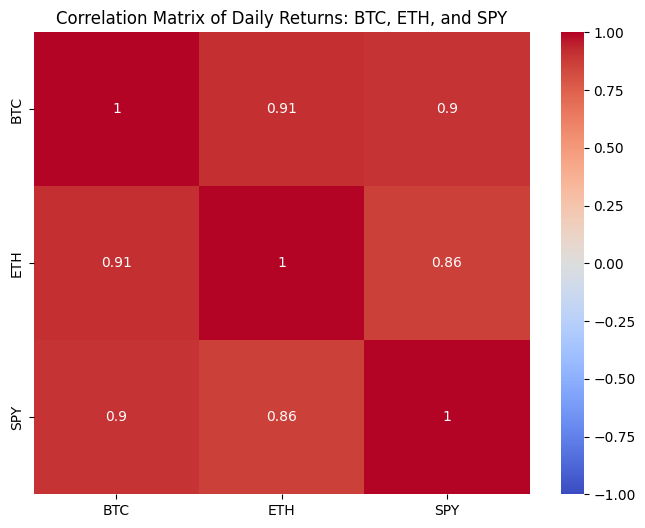

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Daily Returns: BTC, ETH, and SPY")
plt.show()


In [ ]:
# Calculate spread between BTC and ETH
combined_data['Spread'] = combined_data['BTC'] - combined_data['ETH']

# Calculate rolling mean and standard deviation of the spread (e.g., 30-day window)
rolling_mean = combined_data['Spread'].rolling(window=30).mean()
rolling_std = combined_data['Spread'].rolling(window=30).std()

# Define upper and lower thresholds (mean ± 2 * std)
upper_threshold = rolling_mean + 2 * rolling_std
lower_threshold = rolling_mean - 2 * rolling_std


In [ ]:
# Generate trade signals
combined_data['Signal'] = np.where(combined_data['Spread'] > upper_threshold, 'Buy BTC / Sell ETH',
                                   np.where(combined_data['Spread'] < lower_threshold, 'Sell BTC / Buy ETH', 'Hold'))

# Display the latest signal
print("Latest Signal:", combined_data['Signal'].iloc[-1])
print(combined_data[['BTC', 'ETH', 'Spread', 'Signal']].tail())


Latest Signal: Hold
                                    BTC          ETH        Spread  \
Date                                                                 
2024-11-04 00:00:00+00:00  67811.507812  2397.026367  65414.481445   
2024-11-05 00:00:00+00:00  69359.562500  2422.650635  66936.911865   
2024-11-06 00:00:00+00:00  75639.078125  2724.169189  72914.908936   
2024-11-07 00:00:00+00:00  75904.859375  2895.585449  73009.273926   
2024-11-08 00:00:00+00:00  76545.476562  2962.296631  73583.179932   

                                       Signal  
Date                                           
2024-11-04 00:00:00+00:00                Hold  
2024-11-05 00:00:00+00:00                Hold  
2024-11-06 00:00:00+00:00  Buy BTC / Sell ETH  
2024-11-07 00:00:00+00:00  Buy BTC / Sell ETH  
2024-11-08 00:00:00+00:00                Hold  


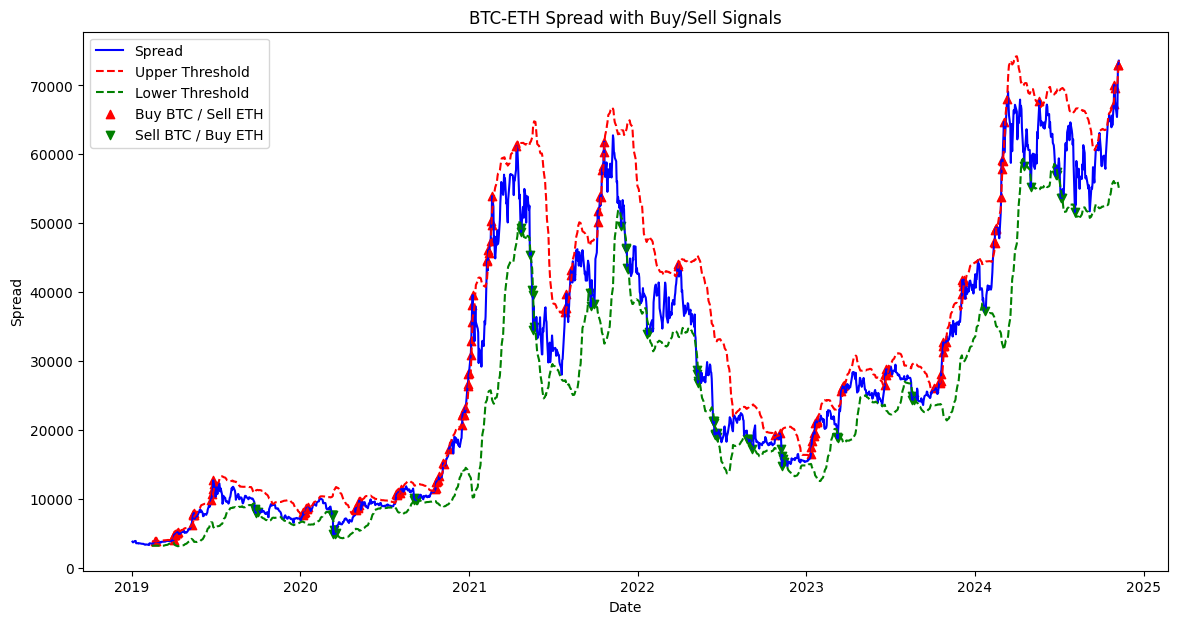

In [ ]:
plt.figure(figsize=(14, 7))

# Plot the spread
plt.plot(combined_data.index, combined_data['Spread'], label='Spread', color='blue')

# Plot upper and lower thresholds
plt.plot(combined_data.index, upper_threshold, label='Upper Threshold', linestyle='--', color='red')
plt.plot(combined_data.index, lower_threshold, label='Lower Threshold', linestyle='--', color='green')

# Mark buy and sell signals
buy_signals = combined_data[combined_data['Signal'] == 'Buy BTC / Sell ETH']
sell_signals = combined_data[combined_data['Signal'] == 'Sell BTC / Buy ETH']

plt.scatter(buy_signals.index, buy_signals['Spread'], color='red', marker='^', label='Buy BTC / Sell ETH')
plt.scatter(sell_signals.index, sell_signals['Spread'], color='green', marker='v', label='Sell BTC / Buy ETH')

# Labels and legend
plt.title("BTC-ETH Spread with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.show()


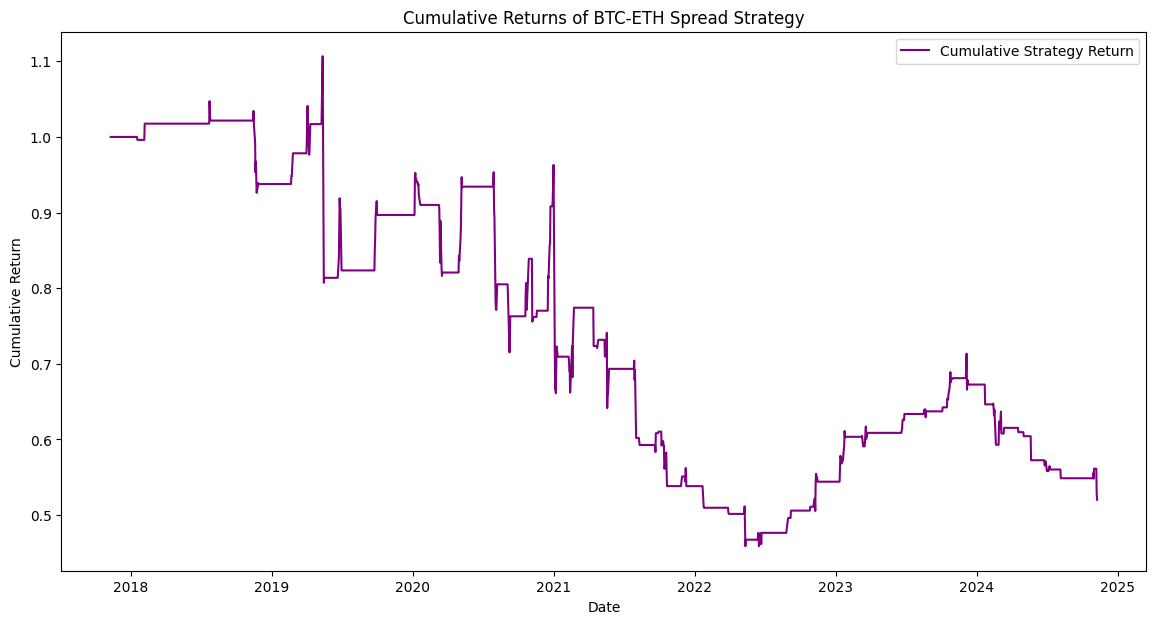

Final Cumulative Return of Strategy: 0.52
Latest Signal: Hold


In [ ]:
# Initialize the Strategy Return column
combined_data['Strategy Return'] = 0.0

# Generate strategy returns based on signals
# Buy BTC / Sell ETH scenario
combined_data.loc[combined_data['Signal'].shift(1) == 'Buy BTC / Sell ETH', 'Strategy Return'] = (
    combined_data['BTC Daily Return'] - combined_data['ETH Daily Return']
)

# Sell BTC / Buy ETH scenario
combined_data.loc[combined_data['Signal'].shift(1) == 'Sell BTC / Buy ETH', 'Strategy Return'] = (
    combined_data['ETH Daily Return'] - combined_data['BTC Daily Return']
)

# Calculate cumulative returns for the strategy
combined_data['Cumulative Strategy Return'] = (1 + combined_data['Strategy Return']).cumprod()

# Plot cumulative strategy returns
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Cumulative Strategy Return'], label='Cumulative Strategy Return', color='purple')
plt.title("Cumulative Returns of BTC-ETH Spread Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# Display final cumulative return
final_return = combined_data['Cumulative Strategy Return'].iloc[-1]
print(f"Final Cumulative Return of Strategy: {final_return:.2f}")
print("Latest Signal:", combined_data['Signal'].iloc[-1])

plt.show()


In [ ]:
# Display final strategy metrics
final_return = combined_data['Cumulative Strategy Return'].iloc[-1]
print(f"Final Cumulative Return of Strategy: {final_return:.2f}")
print("Latest Signal:", combined_data['Signal'].iloc[-1])


Final Cumulative Return of Strategy: 0.52
Latest Signal: Hold
